In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Datacamp Pyspark Tutorial").config("spark.memory.offHeap.enabled","true").config("spark.memory.offHeap.size","10g").getOrCreate()

23/10/09 10:33:44 WARN Utils: Your hostname, rakhul-G15 resolves to a loopback address: 127.0.1.1; using 192.168.0.155 instead (on interface wlan0)
23/10/09 10:33:44 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/09 10:33:45 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/10/09 10:33:45 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [3]:
df = spark.read.csv('sf-fire-calls.csv',header=True,escape="\"")

In [5]:
df.head()

23/10/09 10:33:56 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


Row(CallNumber='20110016', UnitID='T13', IncidentNumber='2003235', CallType='Structure Fire', CallDate='01/11/2002', WatchDate='01/10/2002', CallFinalDisposition='Other', AvailableDtTm='01/11/2002 01:51:44 AM', Address='2000 Block of CALIFORNIA ST', City='SF', Zipcode='94109', Battalion='B04', StationArea='38', Box='3362', OriginalPriority='3', Priority='3', FinalPriority='3', ALSUnit='false', CallTypeGroup=None, NumAlarms='1', UnitType='TRUCK', UnitSequenceInCallDispatch='2', FirePreventionDistrict='4', SupervisorDistrict='5', Neighborhood='Pacific Heights', Location='(37.7895840679362, -122.428071912459)', RowID='020110016-T13', Delay='2.95')

In [6]:
CUSTOMERS_DATA =   'retails_data/customers.csv'
DEPARTMENTS_DATA = 'retails_data/departments.csv'
CATEGORIES_DATA =  'retails_data/categories.csv'
PRODUCTS_DATA =    'retails_data/products.csv'
ORDERS_DATA =      'retails_data/orders.csv'
ORDER_ITEMS_DATA = 'retails_data/order_items.csv'

In [7]:
from pyspark.sql.types import *

In [8]:
# define the schema, corresponding to a line in the csv data file for Customer
customers_schema = StructType([
    StructField('customer_id',       IntegerType(), nullable=True),
    StructField('customer_fname',    StringType(), nullable=True),
    StructField('customer_lname',    StringType(), nullable=True),
    StructField('customer_email',    StringType(), nullable=True),
    StructField('customer_password', StringType(), nullable=True),
    StructField('customer_street',   StringType(), nullable=True),
    StructField('customer_city',     StringType(), nullable=True),
    StructField('customer_state',    StringType(), nullable=True),
    StructField('customer_zipcode',  StringType(), nullable=True)])

In [10]:
products_schema = StructType([
    StructField('product_id',          IntegerType(), nullable=True),
    StructField('product_category_id', IntegerType(), nullable=True),
    StructField('product_name',        StringType(), nullable=True),
    StructField('product_description', StringType(), nullable=True),
    StructField('product_price',       FloatType(), nullable=True),
    StructField('product_image',       StringType(), nullable=True)])

departments_schema = StructType([
    StructField('department_id',   IntegerType(), nullable=True),
    StructField('department_name', StringType(), nullable=True)])

categories_schema = StructType([
    StructField('category_id',            IntegerType(), nullable=True),
    StructField('category_department_id', IntegerType(), nullable=True),
    StructField('category_name',          StringType(), nullable=True)])

orders_schema = StructType([
    StructField('order_id',          IntegerType(), nullable=True),
    StructField('order_date',        StringType(), nullable=True),
    StructField('order_customer_id', IntegerType(), nullable=True),
    StructField('order_status',      StringType(), nullable=True)])

order_items_schema = StructType([
    StructField('order_item_id',            IntegerType(), nullable=True),
    StructField('order_item_order_id',      IntegerType(), nullable=True),
    StructField('order_item_product_id',    IntegerType(), nullable=True),
    StructField('order_item_quantity',      IntegerType(), nullable=True),
    StructField('order_item_subtotal',      FloatType(), nullable=True),
    StructField('order_item_product_price', FloatType(), nullable=True)])




In [11]:
customers_df = spark.read.csv(path=CUSTOMERS_DATA, schema=customers_schema)
customers_df.cache()

departments_df = spark.read.csv(path=DEPARTMENTS_DATA, schema=departments_schema)
departments_df.cache()

categories_df = spark.read.csv(path=CATEGORIES_DATA, schema=categories_schema)
categories_df.cache()

products_df = spark.read.csv(path=PRODUCTS_DATA, schema=products_schema)
products_df.cache()

orders_df = spark.read.csv(path=ORDERS_DATA, schema=orders_schema)
orders_df.cache()

order_items_df = spark.read.csv(path=ORDER_ITEMS_DATA, schema=order_items_schema)
order_items_df.cache()

DataFrame[order_item_id: int, order_item_order_id: int, order_item_product_id: int, order_item_quantity: int, order_item_subtotal: float, order_item_product_price: float]

In [12]:
customers_df.show(5)

+-----------+--------------+--------------+--------------+-----------------+--------------------+-------------+--------------+----------------+
|customer_id|customer_fname|customer_lname|customer_email|customer_password|     customer_street|customer_city|customer_state|customer_zipcode|
+-----------+--------------+--------------+--------------+-----------------+--------------------+-------------+--------------+----------------+
|          1|       Richard|     Hernandez|     XXXXXXXXX|        XXXXXXXXX|  6303 Heather Plaza|  Brownsville|            TX|           78521|
|          2|          Mary|       Barrett|     XXXXXXXXX|        XXXXXXXXX|9526 Noble Embers...|    Littleton|            CO|           80126|
|          3|           Ann|         Smith|     XXXXXXXXX|        XXXXXXXXX|3422 Blue Pioneer...|       Caguas|            PR|           00725|
|          4|          Mary|         Jones|     XXXXXXXXX|        XXXXXXXXX|  8324 Little Common|   San Marcos|            CA|          

Creating Temproary views so we can execute queries

In [17]:
customers_df.createOrReplaceTempView("customers")
departments_df.createOrReplaceTempView("depts")
categories_df.createOrReplaceTempView("categories")
products_df.createOrReplaceTempView("products")
orders_df.createOrReplaceTempView("orders")
order_items_df.createOrReplaceTempView("order_items")


In [18]:
order_items_df.show(5)

+-------------+-------------------+---------------------+-------------------+-------------------+------------------------+
|order_item_id|order_item_order_id|order_item_product_id|order_item_quantity|order_item_subtotal|order_item_product_price|
+-------------+-------------------+---------------------+-------------------+-------------------+------------------------+
|            1|                  1|                  957|                  1|             299.98|                  299.98|
|            2|                  2|                 1073|                  1|             199.99|                  199.99|
|            3|                  2|                  502|                  5|              250.0|                    50.0|
|            4|                  2|                  403|                  1|             129.99|                  129.99|
|            5|                  4|                  897|                  2|              49.98|                   24.99|
+-------------+-

In [21]:
spark.sql("select order_item_product_id,order_item_subtotal from order_items where order_item_product_id=502 ").show()

+---------------------+-------------------+
|order_item_product_id|order_item_subtotal|
+---------------------+-------------------+
|                  502|              250.0|
|                  502|              150.0|
|                  502|               50.0|
|                  502|              250.0|
|                  502|               50.0|
|                  502|               50.0|
|                  502|              250.0|
|                  502|              100.0|
|                  502|               50.0|
|                  502|              250.0|
|                  502|              150.0|
|                  502|              100.0|
|                  502|              100.0|
|                  502|              200.0|
|                  502|               50.0|
|                  502|               50.0|
|                  502|               50.0|
|                  502|              150.0|
|                  502|               50.0|
|                  502|         

![Dmark](cloudera-retail-db.png "test")

In [22]:
spark.sql("select count(order_id) from orders").show()

+---------------+
|count(order_id)|
+---------------+
|          68883|
+---------------+



In [25]:
spark.sql("select o.order_id,sum(oi.order_item_subtotal) from orders o join order_items oi on o.order_id = oi.order_item_order_id group by o.order_id").show()

+--------+------------------------+
|order_id|sum(order_item_subtotal)|
+--------+------------------------+
|     148|      479.99000549316406|
|     463|       829.9200096130371|
|     471|      169.98000717163086|
|     496|        441.950008392334|
|    1088|      249.97000885009766|
|    1580|      299.95001220703125|
|    1591|       439.8599967956543|
|    1645|       1509.790023803711|
|    2366|       299.9700012207031|
|    2659|       724.9100151062012|
|    2866|        569.960018157959|
|    3175|      209.97000122070312|
|    3749|      143.97000122070312|
|    3794|      299.95001220703125|
|    3918|       829.9300155639648|
|    3997|       579.9500122070312|
|    4101|      129.99000549316406|
|    4519|        79.9800033569336|
|    4818|       399.9800109863281|
|    4900|       179.9700050354004|
+--------+------------------------+
only showing top 20 rows



In [27]:
spark.sql("select o.order_date,sum(oi.order_item_subtotal) as revenue_day from orders o join order_items oi on o.order_id = oi.order_item_order_id group by o.order_date order by revenue_day desc").show()

+--------------------+------------------+
|          order_date|       revenue_day|
+--------------------+------------------+
|2013-11-03 00:00:...|175599.20357131958|
|2014-02-01 00:00:...| 153561.8030986786|
|2013-11-14 00:00:...|149271.96297836304|
|2014-06-19 00:00:...|147183.83269500732|
|2013-10-13 00:00:...| 145561.9928665161|
|2013-12-26 00:00:...| 143012.2326412201|
|2013-11-24 00:00:...|142234.02284049988|
|2014-02-19 00:00:...| 141857.2528705597|
|2013-09-25 00:00:...|141775.64274215698|
|2014-07-20 00:00:...| 141499.8028755188|
|2013-09-06 00:00:...|140273.12274360657|
|2014-06-27 00:00:...|139952.39247322083|
|2014-05-16 00:00:...|  139834.472738266|
|2014-01-05 00:00:...|138550.94269180298|
|2013-09-26 00:00:...|138531.17268943787|
|2013-11-05 00:00:...|138528.34267425537|
|2013-10-04 00:00:...|138079.62243652344|
|2013-09-05 00:00:...|137379.87286186218|
|2013-07-29 00:00:...|137287.09244918823|
|2014-01-11 00:00:...|137233.93259239197|
+--------------------+------------

In [41]:
import os
import pandas as pd
import numpy as np

from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession, SQLContext

from pyspark.sql.types import *
from pyspark.sql.window import Window

import pyspark.sql.functions as F
from pyspark.sql.functions import udf, col
import pyspark.sql.functions as F
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
# Visualization
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 50)

sns.set(context='notebook', style='whitegrid', rc={'figure.figsize': (18,4)})
#rcParams['figure.figsize'] = 18,4
# this allows plots to appear directly in the notebook
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# this allows plots to appear directly in the notebook
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

tot_rev_per_month_per_year = (orders_df.join(order_items_df, orders_df.order_id == order_items_df.order_item_order_id)
     .select([F.year('order_date').alias('order_year'), F.month('order_date').alias('order_month'), 'order_item_subtotal'])
     .groupBy(['order_year','order_month'])
     .agg(F.sum('order_item_subtotal').alias('tot_revenue'))
     .orderBy(F.asc('order_year'),F.asc('order_month')))

tot_rev_per_month_per_year.cache()

DataFrame[order_year: int, order_month: int, tot_revenue: double]

In [42]:
tot_rev_per_month_per_year.show()

+----------+-----------+------------------+
|order_year|order_month|       tot_revenue|
+----------+-----------+------------------+
|      2013|          7| 764782.2047252655|
|      2013|          8| 2828658.754573822|
|      2013|          9|2934527.3265972137|
|      2013|         10|2624600.6605644226|
|      2013|         11|3168656.0921707153|
|      2013|         12| 2932964.327445984|
|      2014|          1|2924447.0670757294|
|      2014|          2|2778663.7149181366|
|      2014|          3| 2862492.265932083|
|      2014|          4|2807789.8547916412|
|      2014|          5|2753078.2738227844|
|      2014|          6| 2703463.491306305|
|      2014|          7|2238496.5645008087|
+----------+-----------+------------------+



In [43]:
pdf=tot_rev_per_month_per_year.toPandas()

Text(0.5, 1.0, 'Total revenue Per Year Monthwise')

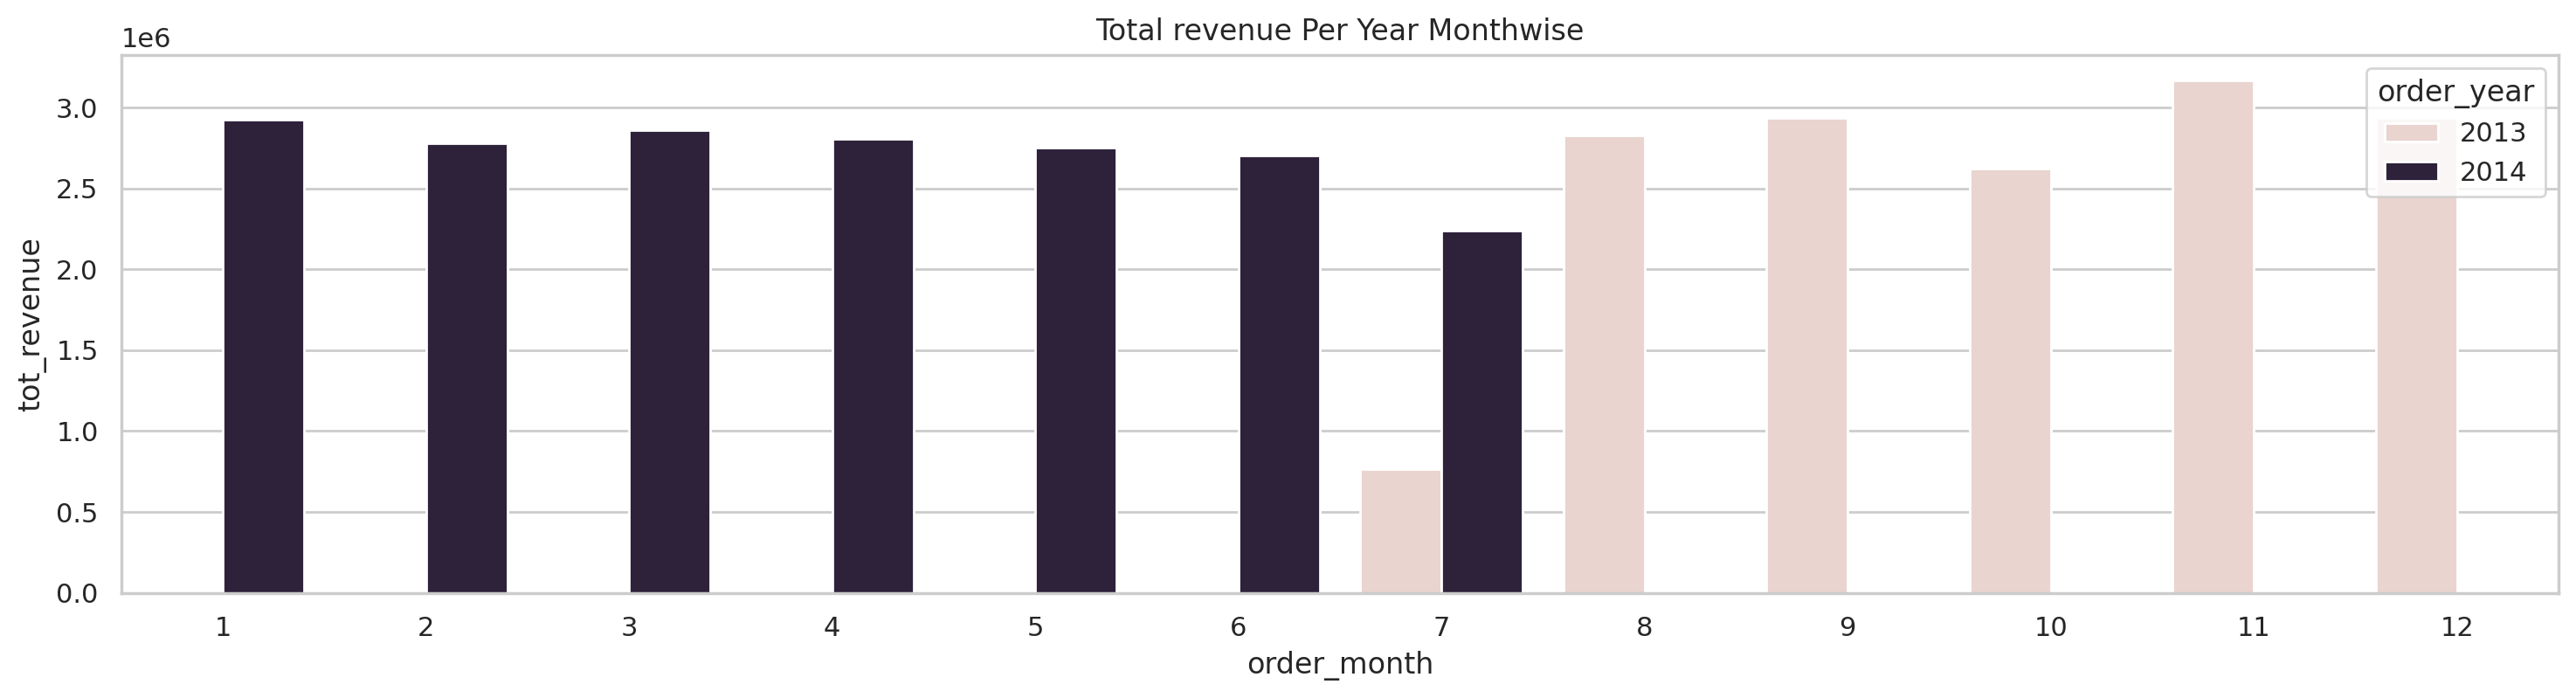

In [44]:
g=sns.barplot(x='order_month',y='tot_revenue',hue='order_year',data=pdf)
g.set_title('Total revenue Per Year Monthwise')